In [1]:
from scipy import stats
import statsmodels.api as sm
import pmdarima as pm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

data = str(datetime.now().year)+'-'+str(datetime.now().month)+'-'+str(datetime.now().day)
data

'2020-5-14'

In [2]:
fonte = 15
params = {
        'font.size': 15,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte
}
plt.rcParams.update(params)

In [3]:
os.chdir('E:\\OneDrive\\Programação\\python\\covid\\data\\results')
directory = os.listdir('..')
printLis(directory)

-------------
-=< Lista >=-
-------------
0 -> .ipynb_checkpoints
1 -> 01-caso_full_2020-04-22.csv
2 -> 02-caso_full_2020-04-30.csv
3 -> 03-caso_full_2020-05-13.csv
4 -> artigo
5 -> cities.csv
6 -> covid19_municipios.csv
7 -> COVID19_REGIOES BR.csv
8 -> Dados_demográficos_municípios.xlsx
9 -> Dados_demográficos_municípios_new.xlsx
10 -> Datalab_COVID.pptx
11 -> figures
12 -> idade.xlsx
13 -> obito_cartorio.csv
14 -> População residente municipal x população faixa etária.csv
15 -> População residente por estado - 2015.csv
16 -> População residente x sexo.csv
17 -> results


In [4]:
date = 3
df_cov =  pd.read_csv('..\\'+directory[date])
df_cov.tail()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
77233,NaN,43.0,2020-05-13,20,11377239.0,False,True,2917,25.63891,2020-05-12,0.0381,111,65,state,RS,0,0
77234,NaN,42.0,2020-05-13,20,7164788.0,False,True,3733,52.10203,2020-05-12,0.0196,73,63,state,SC,0,0
77235,NaN,28.0,2020-05-13,20,2298696.0,False,True,2032,88.39794,2020-05-12,0.0182,37,61,state,SE,0,0
77236,NaN,35.0,2020-05-13,20,45919049.0,True,False,51097,111.27626,2020-05-13,0.0806,4118,79,state,SP,3378,169
77237,NaN,17.0,2020-05-13,20,1572866.0,False,True,828,52.64276,2020-05-11,0.0169,14,57,state,TO,0,0


In [5]:
# df_cov = df_cov[(df_cov['last_available_date'] == '2020-04-10') & (df_cov['place_type'] == 'city')][[
#     "estimated_population_2019",
#     "last_available_confirmed",
#     "last_available_deaths",
#     "last_available_confirmed_per_100k_inhabitants",
#     "last_available_death_rate",
#     "city",
#     "last_available_date"
# ]]
# df_cov = df_cov.rename(columns={
#     "estimated_population_2019": "Population",
#     "last_available_confirmed": "Confirmed",
#     "last_available_deaths": "Deaths",
#     "last_available_confirmed_per_100k_inhabitants": "Confirmed/100k",
#     "last_available_death_rate": "Death Rate",
#     "city": "City",
#     "last_available_date": "Date"
# })
# df_cov.index.name = 'Date'
# df_cov.head()

In [6]:
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77238 entries, 0 to 77237
Data columns (total 17 columns):
city                                             75560 non-null object
city_ibge_code                                   76416 non-null float64
date                                             77238 non-null object
epidemiological_week                             77238 non-null int64
estimated_population_2019                        76416 non-null float64
is_last                                          77238 non-null bool
is_repeated                                      77238 non-null bool
last_available_confirmed                         77238 non-null int64
last_available_confirmed_per_100k_inhabitants    74744 non-null float64
last_available_date                              77238 non-null object
last_available_death_rate                        77238 non-null float64
last_available_deaths                            77238 non-null int64
order_for_place                           

In [7]:
teste = 'date'
df_cov = df_cov[['last_available_confirmed', 'last_available_deaths', 'last_available_confirmed_per_100k_inhabitants', teste]]
df_cov[teste] = pd.to_datetime(df_cov[teste])
group = df_cov.groupby(teste)
df = pd.DataFrame()
df['Confirmed'] = group.sum()['last_available_confirmed']
df['Deaths'] = group.sum()['last_available_deaths']
df['Confirmed/100k'] = group.sum()['last_available_confirmed_per_100k_inhabitants']
df.index.name = 'Date'
df.head()

,Confirmed,Deaths,Confirmed/100k
Date,,,
2020-02-25,2,0,0.01034
2020-02-26,2,0,0.01034
2020-02-27,2,0,0.01034
2020-02-28,4,0,0.02068
2020-02-29,4,0,0.02068


In [8]:
df.tail()

,Confirmed,Deaths,Confirmed/100k
Date,,,
2020-05-09,314480,21392,129601.54233
2020-05-10,326956,22346,136072.05287
2020-05-11,339376,23315,145413.72071
2020-05-12,355660,24773,155698.27541
2020-05-13,362844,25131,157765.30995


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79 entries, 2020-02-25 to 2020-05-13
Data columns (total 3 columns):
Confirmed         79 non-null int64
Deaths            79 non-null int64
Confirmed/100k    79 non-null float64
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [10]:
g = 1
campo = 'Confirmed'
print_campo = 'n'
figsize=(30, 5)
first = '2020-' + str(df.tail(1).index.month[0] - 1) + '-' + str(df.tail(1).index.day[0])
last = '2020-' + str(df.tail(1).index.month[0] + 1) + '-' + str(df.tail(1).index.day[0])
start = '2020-' + str(df.head(1).index.month[0]) + '-' + str(df.head(1).index.day[0])
end = '2020-' + str(df.tail(1).index.month[0]) + '-' + str(df.tail(1).index.day[0])
try:
    os.mkdir('ts')
    print('Directory created')
except FileExistsError:
    print('Directory already exists')

Directory already exists


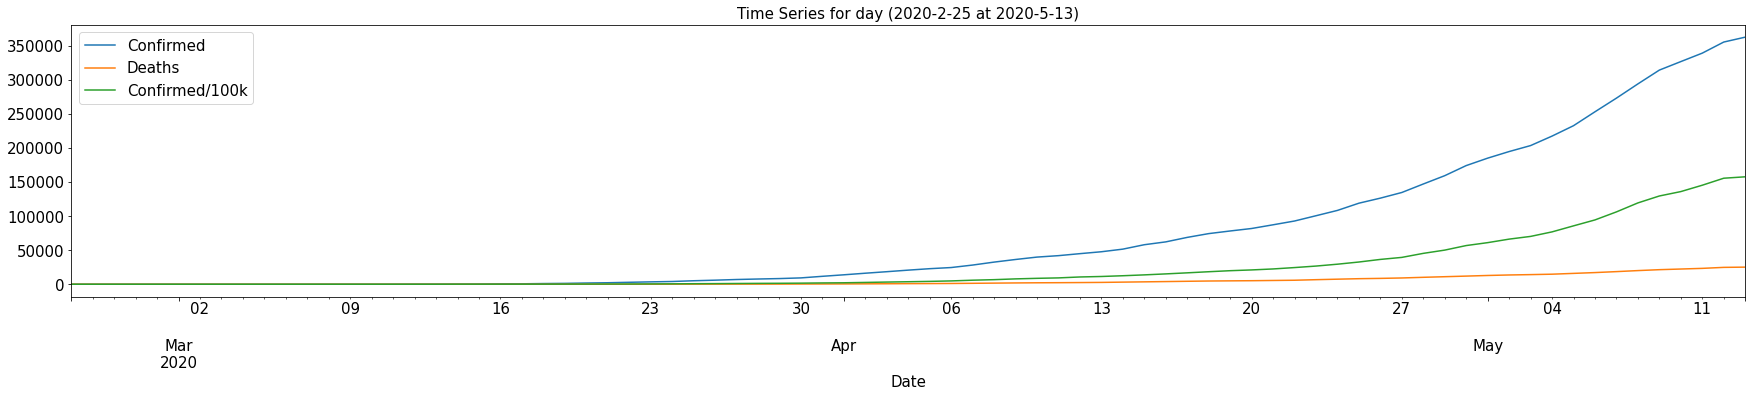

In [11]:
df.plot(figsize=figsize)
plt.title('Time Series for day ('+str(start)+' at '+str(end)+')')
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png', dpi=150)

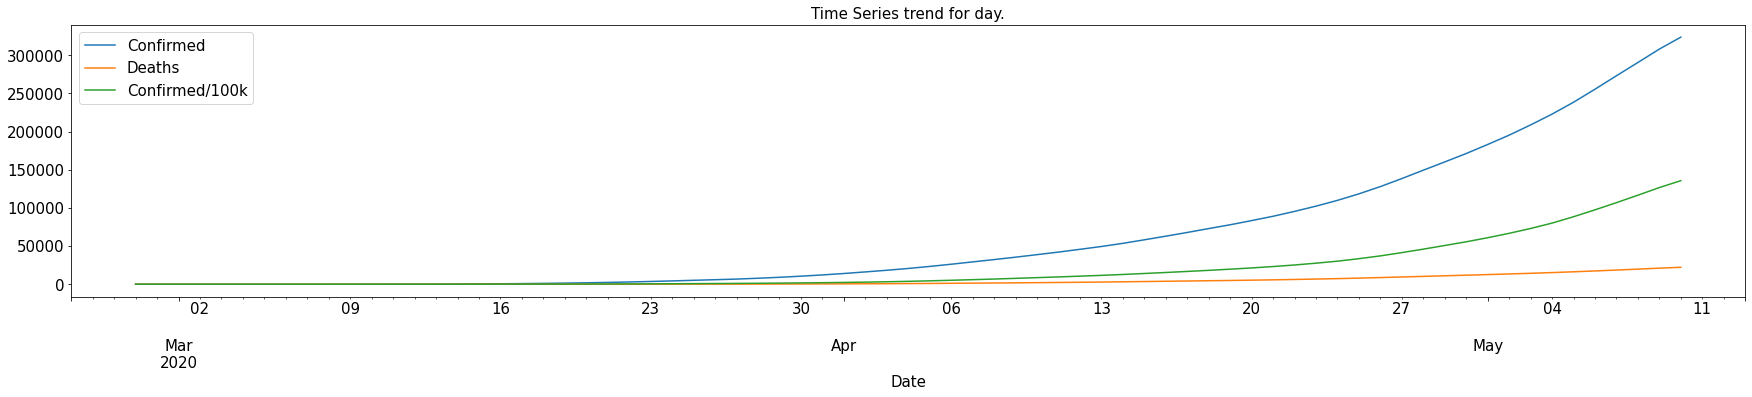

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
dec = seasonal_decompose(df[campo])
dec.trend.plot(figsize=figsize, ax=ax)

campo1 = 'Deaths'
dec = seasonal_decompose(df[campo1])
dec.trend.plot(figsize=figsize, ax=ax)

campo2 = 'Confirmed/100k'
dec = seasonal_decompose(df[campo2])
dec.trend.plot(figsize=figsize, ax=ax)

plt.legend([campo, campo1, campo2])
plt.title('Time Series trend for day.')
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png', dpi=150)

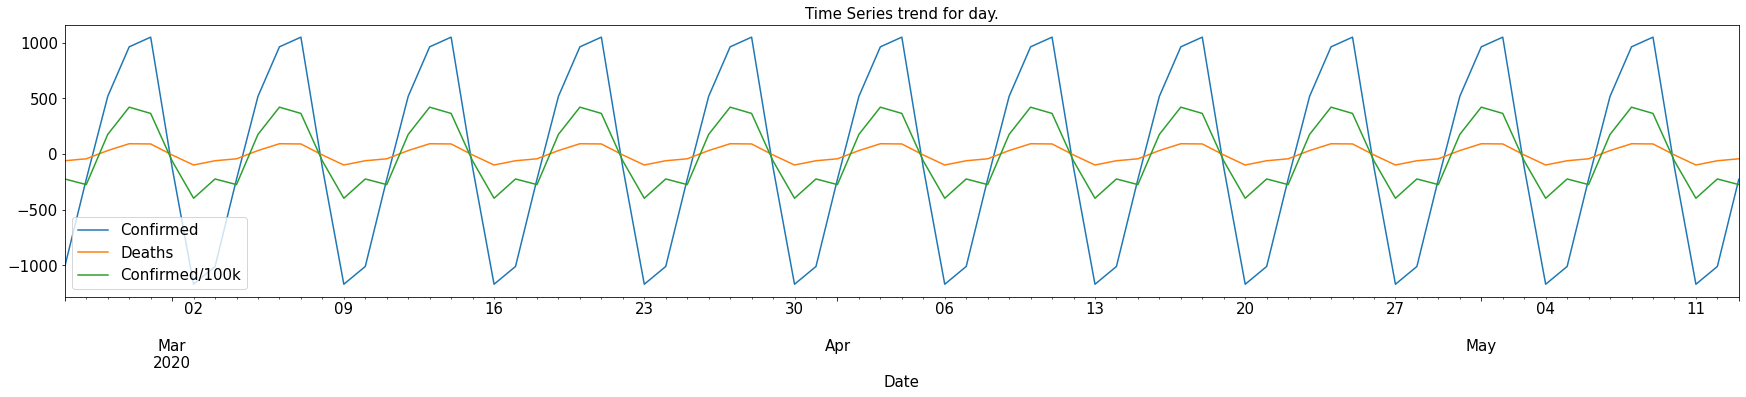

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
dec = seasonal_decompose(df[campo])
dec.seasonal.plot(figsize=figsize, ax=ax)

campo1 = 'Deaths'
dec = seasonal_decompose(df[campo1])
dec.seasonal.plot(figsize=figsize, ax=ax)

campo2 = 'Confirmed/100k'
dec = seasonal_decompose(df[campo2])
dec.seasonal.plot(figsize=figsize, ax=ax)

plt.legend([campo, campo1, campo2])
plt.title('Time Series trend for day.')
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png', dpi=150)

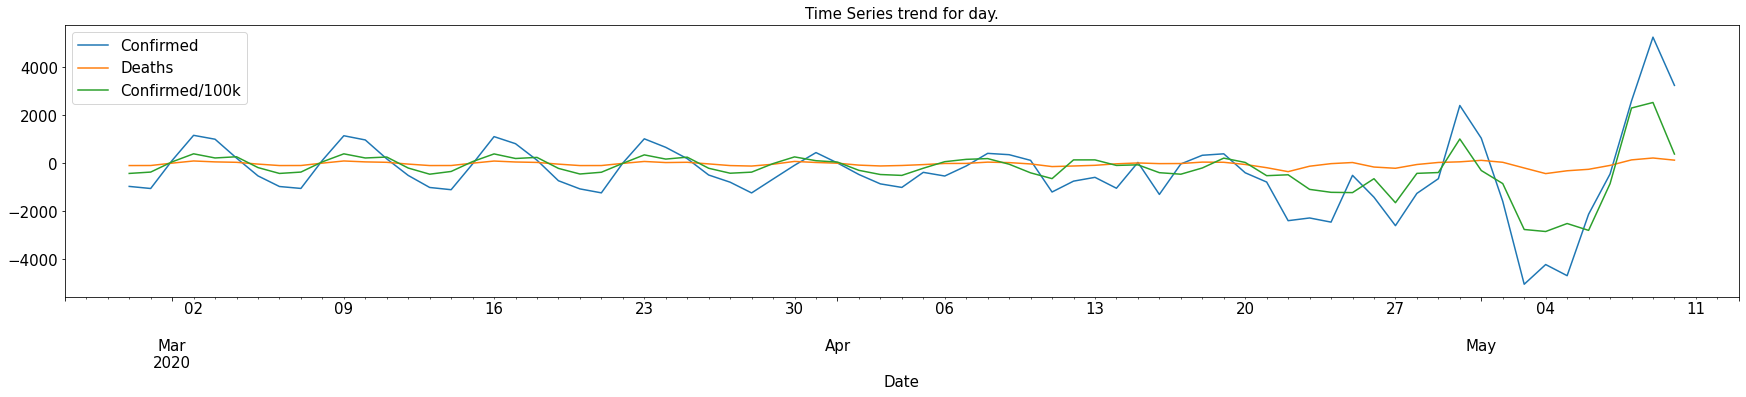

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
dec = seasonal_decompose(df[campo])
dec.resid.plot(figsize=figsize, ax=ax)

campo1 = 'Deaths'
dec = seasonal_decompose(df[campo1])
dec.resid.plot(figsize=figsize, ax=ax)

campo2 = 'Confirmed/100k'
dec = seasonal_decompose(df[campo2])
dec.resid.plot(figsize=figsize, ax=ax)

plt.legend([campo, campo1, campo2])
plt.title('Time Series trend for day.')
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png', dpi=150)

In [15]:
for p in range(3):
    for q in range(3):
        for d in range(3):
            test = (p, q, d)
            modelo = ARIMA(df[campo], order=test, freq='D')
            try:
                results = modelo.fit()
                print(f'({p}, {q}, {d})')
                print(results.summary())
                print()
            except: 
                print('Não')

(0, 0, 0)
                              ARMA Model Results                              
Dep. Variable:              Confirmed   No. Observations:                   79
Model:                     ARMA(0, 0)   Log Likelihood               -1022.750
Method:                           css   S.D. of innovations         101443.969
Date:                Thu, 14 May 2020   AIC                           2049.500
Time:                        09:19:52   BIC                           2054.239
Sample:                    02-25-2020   HQIC                          2051.398
                         - 05-13-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.268e+04   1.14e+04      6.368      0.000    5.03e+04     9.5e+04

(0, 0, 1)
                              ARMA Model Results                              
Dep. Variable:              Con

C:\Users\gfsil\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\gfsil\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(0, 0, 2)
                              ARMA Model Results                              
Dep. Variable:              Confirmed   No. Observations:                   79
Model:                     ARMA(0, 2)   Log Likelihood                -925.137
Method:                       css-mle   S.D. of innovations          27391.462
Date:                Thu, 14 May 2020   AIC                           1858.273
Time:                        09:19:52   BIC                           1867.751
Sample:                    02-25-2020   HQIC                          1862.070
                         - 05-13-2020                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            7.448e+04   1.21e+04      6.140      0.000    5.07e+04    9.83e+04
ma.L1.Confirmed     1.9855      0.088     22.682      0.000       1.814       2.157
ma.L2.Confirmed     1.

C:\Users\gfsil\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\gfsil\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\gfsil\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\gfsil\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\gfsil\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


(1, 1, 0)
                             ARIMA Model Results                              
Dep. Variable:            D.Confirmed   No. Observations:                   78
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -704.185
Method:                       css-mle   S.D. of innovations           1990.367
Date:                Thu, 14 May 2020   AIC                           1414.370
Time:                        09:19:52   BIC                           1421.441
Sample:                    02-26-2020   HQIC                          1417.201
                         - 05-13-2020                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4384.0547   2849.782      1.538      0.124   -1201.416    9969.525
ar.L1.D.Confirmed     0.9319      0.037     25.470      0.000       0.860       1.004
              

(1, 2, 2)
                             ARIMA Model Results                              
Dep. Variable:           D2.Confirmed   No. Observations:                   77
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -694.253
Method:                       css-mle   S.D. of innovations           1992.238
Date:                Thu, 14 May 2020   AIC                           1398.506
Time:                        09:19:53   BIC                           1410.225
Sample:                    02-27-2020   HQIC                          1403.193
                         - 05-13-2020                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                114.6471    193.246      0.593      0.553    -264.108     493.402
ar.L1.D2.Confirmed    -0.0142      0.637     -0.022      0.982      -1.262       1.234
ma.L1.D2.C

C:\Users\gfsil\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(2, 0, 0)
                              ARMA Model Results                              
Dep. Variable:              Confirmed   No. Observations:                   79
Model:                     ARMA(2, 0)   Log Likelihood                -718.008
Method:                       css-mle   S.D. of innovations           1992.363
Date:                Thu, 14 May 2020   AIC                           1444.016
Time:                        09:19:53   BIC                           1453.493
Sample:                    02-25-2020   HQIC                          1447.813
                         - 05-13-2020                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            7.268e+04   1.23e+05      0.591      0.555   -1.68e+05    3.14e+05
ar.L1.Confirmed     1.9611      0.026     75.471      0.000       1.910       2.012
ar.L2.Confirmed    -0.

(2, 2, 1)
                             ARIMA Model Results                              
Dep. Variable:           D2.Confirmed   No. Observations:                   77
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -693.937
Method:                       css-mle   S.D. of innovations           1983.776
Date:                Thu, 14 May 2020   AIC                           1397.875
Time:                        09:19:54   BIC                           1409.594
Sample:                    02-27-2020   HQIC                          1402.563
                         - 05-13-2020                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                118.1192    178.947      0.660      0.509    -232.611     468.849
ar.L1.D2.Confirmed    -0.7779      0.394     -1.974      0.048      -1.550      -0.006
ar.L2.D2.C

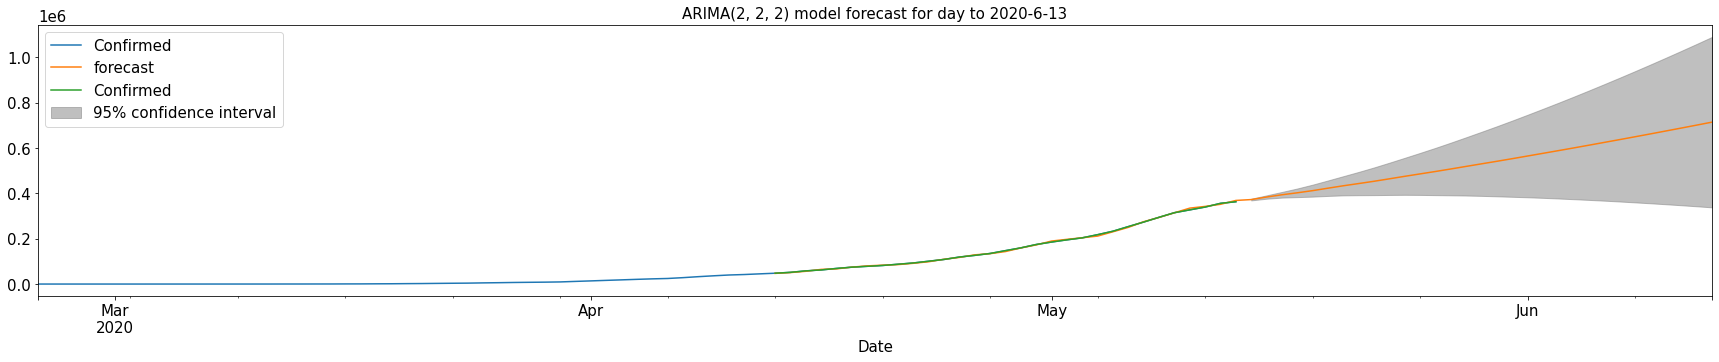

In [16]:
test = (2,2,2) #paramentros guardados em uma variável
modelo = ARIMA(df[campo], order=test, freq='D') #parametros para o modelo preditivo
results = modelo.fit() #ajuste de modelo
plt.figure(figsize=figsize) #plotando imagem
results.plot_predict(
   first, last,               #plotando a primeira e ultima data?
    ax = df[campo].plot(), #filtrando e usando apenas a coluna 'confirmed'
    plot_insample=True,
)
plt.title('ARIMA'+str(test)+' model forecast for day to ' + last)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png', dpi=150)

In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.Confirmed   No. Observations:                   77
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -690.658
Method:                       css-mle   S.D. of innovations           1847.839
Date:                Thu, 14 May 2020   AIC                           1393.316
Time:                        09:20:09   BIC                           1407.379
Sample:                    02-27-2020   HQIC                          1398.941
                         - 05-13-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                121.5683    215.338      0.565      0.572    -300.486     543.623
ar.L1.D2.Confirmed     0.1739      0.104      1.664      0.096      -0.031       0.379
ar.L2.D2.Confirmed    -0.7396      0.101     -7.310      0.000      -0.938      -0.541
ma.L1.D2.Confirmed    -0.3967      0.052     -7.622      0.000      -0.499      -0.295
ma.L2.D2.Confirmed     1.0000      0.068     14.623      0.000       0.866       1.134
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.1175           -1.1568j            1.1628           -0.2339
AR.2            0.1175           +1.1568j            1.1628            0.2339
MA.1            0.1984           -0.9801j            1.0000           -0.2182
MA.2            0.1984           +0.9801j            1.0000            0.2182
-----------------------------------------------------------------------------
"""

In [18]:
pred = results.forecast(steps=30)
pred

(array([372296.11505412, 383461.6351965 , 393437.83523181, 402130.3274352 ,
        411669.63605506, 422495.98465558, 433110.11663586, 442925.77071009,
        452949.91072721, 463791.22167944, 474810.75139139, 485447.21200624,
        496075.60470454, 507176.27075088, 518555.36096215, 529823.8993655 ,
        541057.63492517, 552557.43451842, 564319.5807112 , 576120.89787254,
        587925.33431861, 599891.68888486, 612074.23505947, 624364.95686806,
        636704.93256254, 649163.80958892, 661797.27694227, 674563.50353827,
        687414.02755198, 700371.36284267]),
 array([  1847.83926957,   3768.02828815,   6364.60247388,   9723.19221501,
         13478.58333977,  17396.81058874,  21588.6702724 ,  26188.98071237,
         31126.72441223,  36272.24278848,  41625.46902406,  47253.15169353,
         53151.40384272,  59259.20876425,  65555.06946104,  72065.15296919,
         78798.32922924,  85728.28412983,  92835.27815497, 100126.0288484 ,
        107607.98894462, 115270.74185046, 12

In [19]:
import warnings
import itertools
warnings.filterwarnings("ignore")

In [20]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 30) for x in list(itertools.product(p, d, q))]
y = df[campo]
aic_list = list()
param_list = list()
param_s_list = list()
param = test
for param_seasonal in seasonal_pdq:
    try:
        results = sm.tsa.statespace.SARIMAX(
                        y,
                        order=param,
                        seasonal_order=param_seasonal,
                        enforce_stationarity=False,
                        enforce_invertibility=False
        ).fit()
        print(f'ARIMA{param}x{param_seasonal} - AIC:{results.aic}')
        param_list.append(param)
        param_s_list.append(param_seasonal)
        aic_list.append(results.aic)
    except: 
        continue

ARIMA(2, 2, 2)x(0, 0, 0, 30) - AIC:1341.6306014418608
ARIMA(2, 2, 2)x(0, 0, 1, 30) - AIC:821.9189855333976
ARIMA(2, 2, 2)x(0, 0, 2, 30) - AIC:283.65980572284053
ARIMA(2, 2, 2)x(0, 1, 0, 30) - AIC:819.8274502797088
ARIMA(2, 2, 2)x(0, 1, 1, 30) - AIC:280.24533101018386
ARIMA(2, 2, 2)x(0, 1, 2, 30) - AIC:14.0
ARIMA(2, 2, 2)x(0, 2, 0, 30) - AIC:279.047622940417
ARIMA(2, 2, 2)x(0, 2, 1, 30) - AIC:12.0
ARIMA(2, 2, 2)x(0, 2, 2, 30) - AIC:14.0
ARIMA(2, 2, 2)x(1, 0, 0, 30) - AIC:837.9383168243014
ARIMA(2, 2, 2)x(1, 0, 1, 30) - AIC:823.3568292603217
ARIMA(2, 2, 2)x(1, 0, 2, 30) - AIC:284.2441901931563
ARIMA(2, 2, 2)x(1, 1, 0, 30) - AIC:299.5057349092945
ARIMA(2, 2, 2)x(1, 1, 1, 30) - AIC:282.984961251677
ARIMA(2, 2, 2)x(1, 1, 2, 30) - AIC:16.0
ARIMA(2, 2, 2)x(1, 2, 0, 30) - AIC:12.0
ARIMA(2, 2, 2)x(1, 2, 1, 30) - AIC:14.0
ARIMA(2, 2, 2)x(1, 2, 2, 30) - AIC:16.0
ARIMA(2, 2, 2)x(2, 0, 0, 30) - AIC:298.5763881208382
ARIMA(2, 2, 2)x(2, 0, 1, 30) - AIC:303.0444341054542
ARIMA(2, 2, 2)x(2, 0, 2, 30) -

In [21]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 30) for x in list(itertools.product(p, d, q))]
y = df[campo]
aic_list = list()
param_list = list()
param_s_list = list()
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            results = sm.tsa.statespace.SARIMAX(
                            y,
                            order=param,
                            seasonal_order=param_seasonal,
                            enforce_stationarity=False,
                            enforce_invertibility=False
            ).fit()
            print(f'ARIMA{param}x{param_seasonal} - AIC:{results.aic}')
            param_list.append(param)
            param_s_list.append(param_seasonal)
            aic_list.append(results.aic)
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 30) - AIC:2054.9213725626005
ARIMA(0, 0, 0)x(0, 0, 1, 30) - AIC:1214.4948021725738
ARIMA(0, 0, 0)x(0, 0, 2, 30) - AIC:458.1179290019004
ARIMA(0, 0, 0)x(0, 1, 0, 30) - AIC:1285.5436963997552
ARIMA(0, 0, 0)x(0, 1, 1, 30) - AIC:461.2645357641889
ARIMA(0, 0, 0)x(0, 1, 2, 30) - AIC:6.0
ARIMA(0, 0, 0)x(0, 2, 0, 30) - AIC:525.3990262105317
ARIMA(0, 0, 0)x(0, 2, 1, 30) - AIC:4.0
ARIMA(0, 0, 0)x(0, 2, 2, 30) - AIC:6.0
ARIMA(0, 0, 0)x(1, 0, 0, 30) - AIC:1193.6523779035715
ARIMA(0, 0, 0)x(1, 0, 1, 30) - AIC:1210.0127859827348
ARIMA(0, 0, 0)x(1, 0, 2, 30) - AIC:459.9113035396132
ARIMA(0, 0, 0)x(1, 1, 0, 30) - AIC:469.26028578276294
ARIMA(0, 0, 0)x(1, 1, 1, 30) - AIC:455.95828328729544
ARIMA(0, 0, 0)x(1, 1, 2, 30) - AIC:8.0
ARIMA(0, 0, 0)x(1, 2, 0, 30) - AIC:4.0
ARIMA(0, 0, 0)x(1, 2, 1, 30) - AIC:6.0
ARIMA(0, 0, 0)x(1, 2, 2, 30) - AIC:8.0
ARIMA(0, 0, 0)x(2, 0, 0, 30) - AIC:459.4110325831486
ARIMA(0, 0, 0)x(2, 0, 1, 30) - AIC:483.2358358754926
ARIMA(0, 0, 0)x(2, 0, 2, 30) - 

ARIMA(0, 2, 0)x(1, 1, 1, 30) - AIC:316.3520686417659
ARIMA(0, 2, 0)x(1, 1, 2, 30) - AIC:8.0
ARIMA(0, 2, 0)x(1, 2, 0, 30) - AIC:4.0
ARIMA(0, 2, 0)x(1, 2, 1, 30) - AIC:6.0
ARIMA(0, 2, 0)x(1, 2, 2, 30) - AIC:8.0
ARIMA(0, 2, 0)x(2, 0, 0, 30) - AIC:330.10770504913154
ARIMA(0, 2, 0)x(2, 0, 1, 30) - AIC:332.1077050492805
ARIMA(0, 2, 0)x(2, 0, 2, 30) - AIC:315.96907129314036
ARIMA(0, 2, 0)x(2, 1, 0, 30) - AIC:6.0
ARIMA(0, 2, 0)x(2, 1, 1, 30) - AIC:8.0
ARIMA(0, 2, 0)x(2, 1, 2, 30) - AIC:10.0
ARIMA(0, 2, 0)x(2, 2, 0, 30) - AIC:6.0
ARIMA(0, 2, 0)x(2, 2, 1, 30) - AIC:8.0
ARIMA(0, 2, 0)x(2, 2, 2, 30) - AIC:10.0
ARIMA(0, 2, 1)x(0, 0, 0, 30) - AIC:1358.8648809651836
ARIMA(0, 2, 1)x(0, 0, 1, 30) - AIC:832.306004499093
ARIMA(0, 2, 1)x(0, 0, 2, 30) - AIC:298.1174085292373
ARIMA(0, 2, 1)x(0, 1, 0, 30) - AIC:838.1897301665534
ARIMA(0, 2, 1)x(0, 1, 1, 30) - AIC:296.5698552013105
ARIMA(0, 2, 1)x(0, 1, 2, 30) - AIC:8.0
ARIMA(0, 2, 1)x(0, 2, 0, 30) - AIC:294.92142664060196
ARIMA(0, 2, 1)x(0, 2, 1, 30) - AIC:6

ARIMA(1, 1, 1)x(0, 0, 1, 30) - AIC:855.114172877429
ARIMA(1, 1, 1)x(0, 0, 2, 30) - AIC:319.4754996454558
ARIMA(1, 1, 1)x(0, 1, 0, 30) - AIC:857.3093988446193
ARIMA(1, 1, 1)x(0, 1, 1, 30) - AIC:317.7577384067414
ARIMA(1, 1, 1)x(0, 1, 2, 30) - AIC:10.0
ARIMA(1, 1, 1)x(0, 2, 0, 30) - AIC:315.9100274962037
ARIMA(1, 1, 1)x(0, 2, 1, 30) - AIC:8.0
ARIMA(1, 1, 1)x(0, 2, 2, 30) - AIC:10.0
ARIMA(1, 1, 1)x(1, 0, 0, 30) - AIC:876.7377493506717
ARIMA(1, 1, 1)x(1, 0, 1, 30) - AIC:857.0984482668575
ARIMA(1, 1, 1)x(1, 0, 2, 30) - AIC:321.34468732456975
ARIMA(1, 1, 1)x(1, 1, 0, 30) - AIC:335.98517689241373
ARIMA(1, 1, 1)x(1, 1, 1, 30) - AIC:319.5413358700958
ARIMA(1, 1, 1)x(1, 1, 2, 30) - AIC:12.0
ARIMA(1, 1, 1)x(1, 2, 0, 30) - AIC:8.0
ARIMA(1, 1, 1)x(1, 2, 1, 30) - AIC:10.0
ARIMA(1, 1, 1)x(1, 2, 2, 30) - AIC:12.0
ARIMA(1, 1, 1)x(2, 0, 0, 30) - AIC:345.5539037266797
ARIMA(1, 1, 1)x(2, 0, 1, 30) - AIC:336.0625911000636
ARIMA(1, 1, 1)x(2, 0, 2, 30) - AIC:319.93223561668844
ARIMA(1, 1, 1)x(2, 1, 0, 30) - 

ARIMA(2, 0, 1)x(1, 1, 2, 30) - AIC:14.0
ARIMA(2, 0, 1)x(1, 2, 0, 30) - AIC:10.0
ARIMA(2, 0, 1)x(1, 2, 1, 30) - AIC:12.0
ARIMA(2, 0, 1)x(1, 2, 2, 30) - AIC:14.0
ARIMA(2, 0, 1)x(2, 0, 0, 30) - AIC:341.07095697105296
ARIMA(2, 0, 1)x(2, 0, 1, 30) - AIC:341.80631735654765
ARIMA(2, 0, 1)x(2, 0, 2, 30) - AIC:343.866653152688
ARIMA(2, 0, 1)x(2, 1, 0, 30) - AIC:12.0
ARIMA(2, 0, 1)x(2, 1, 1, 30) - AIC:14.0
ARIMA(2, 0, 1)x(2, 1, 2, 30) - AIC:16.0
ARIMA(2, 0, 1)x(2, 2, 0, 30) - AIC:12.0
ARIMA(2, 0, 1)x(2, 2, 1, 30) - AIC:14.0
ARIMA(2, 0, 1)x(2, 2, 2, 30) - AIC:16.0
ARIMA(2, 0, 2)x(0, 0, 0, 30) - AIC:1379.3371171064412
ARIMA(2, 0, 2)x(0, 0, 1, 30) - AIC:858.6459454532776
ARIMA(2, 0, 2)x(0, 0, 2, 30) - AIC:321.69802401285625
ARIMA(2, 0, 2)x(0, 1, 0, 30) - AIC:857.8334567590534
ARIMA(2, 0, 2)x(0, 1, 1, 30) - AIC:317.99354846622373
ARIMA(2, 0, 2)x(0, 1, 2, 30) - AIC:14.0
ARIMA(2, 0, 2)x(0, 2, 0, 30) - AIC:318.0666803911413
ARIMA(2, 0, 2)x(0, 2, 1, 30) - AIC:12.0
ARIMA(2, 0, 2)x(0, 2, 2, 30) - AIC:14.0

ARIMA(2, 2, 2)x(0, 0, 1, 30) - AIC:821.9189855333976
ARIMA(2, 2, 2)x(0, 0, 2, 30) - AIC:283.65980572284053
ARIMA(2, 2, 2)x(0, 1, 0, 30) - AIC:819.8274502797088
ARIMA(2, 2, 2)x(0, 1, 1, 30) - AIC:280.24533101018386
ARIMA(2, 2, 2)x(0, 1, 2, 30) - AIC:14.0
ARIMA(2, 2, 2)x(0, 2, 0, 30) - AIC:279.047622940417
ARIMA(2, 2, 2)x(0, 2, 1, 30) - AIC:12.0
ARIMA(2, 2, 2)x(0, 2, 2, 30) - AIC:14.0
ARIMA(2, 2, 2)x(1, 0, 0, 30) - AIC:837.9383168243014
ARIMA(2, 2, 2)x(1, 0, 1, 30) - AIC:823.3568292603217
ARIMA(2, 2, 2)x(1, 0, 2, 30) - AIC:284.2441901931563
ARIMA(2, 2, 2)x(1, 1, 0, 30) - AIC:299.5057349092945
ARIMA(2, 2, 2)x(1, 1, 1, 30) - AIC:282.984961251677
ARIMA(2, 2, 2)x(1, 1, 2, 30) - AIC:16.0
ARIMA(2, 2, 2)x(1, 2, 0, 30) - AIC:12.0
ARIMA(2, 2, 2)x(1, 2, 1, 30) - AIC:14.0
ARIMA(2, 2, 2)x(1, 2, 2, 30) - AIC:16.0
ARIMA(2, 2, 2)x(2, 0, 0, 30) - AIC:298.5763881208382
ARIMA(2, 2, 2)x(2, 0, 1, 30) - AIC:303.0444341054542
ARIMA(2, 2, 2)x(2, 0, 2, 30) - AIC:286.1657436780611
ARIMA(2, 2, 2)x(2, 1, 0, 30) - 

In [82]:
aic_new_list = list()
for c in aic_list:
    if c > 100:
        aic_new_list.append(c)
aic_list = aic_new_list

In [83]:
best = aic_list.index(min(aic_list))
print(f'SARIMA{param_list[best]}x{param_s_list[best]} - AIC:{aic_list[best]}')

SARIMA(0, 1, 1)x(1, 0, 0, 30) - AIC:277.68203277775564


In [84]:
y = df[campo]
# param_list_best=(2,2,2)
# param_s_list_best=(0,2,2,30)
param_list_best=param_list[best]
param_s_list_best=param_s_list[best]
mod = sm.tsa.statespace.SARIMAX(
                                y,
                                order=param_list_best,
                                seasonal_order=param_s_list_best,
                                enforce_stationarity=False,
                                enforce_invertibility=False
)
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           Confirmed   No. Observations:                   79
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 30)   Log Likelihood                -454.832
Date:                             Thu, 14 May 2020   AIC                            915.663
Time:                                     10:14:49   BIC                            921.277
Sample:                                 02-25-2020   HQIC                           917.785
                                      - 05-13-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6809      0.091      7.512      0.000       0.503       0.859
ar.S.L30       4.9572      0.421     11.784      0.000       4.133       5.782
sigma2        9.9e+06   1.66e+06      5.975      0.000    6.65e+06    1.31e+07
===================================================================================
Ljung-Box (Q):                       24.45   Jarque-Bera (JB):                 6.87
Prob(Q):                              0.97   Prob(JB):                         0.03
Heteroskedasticity (H):               7.79   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

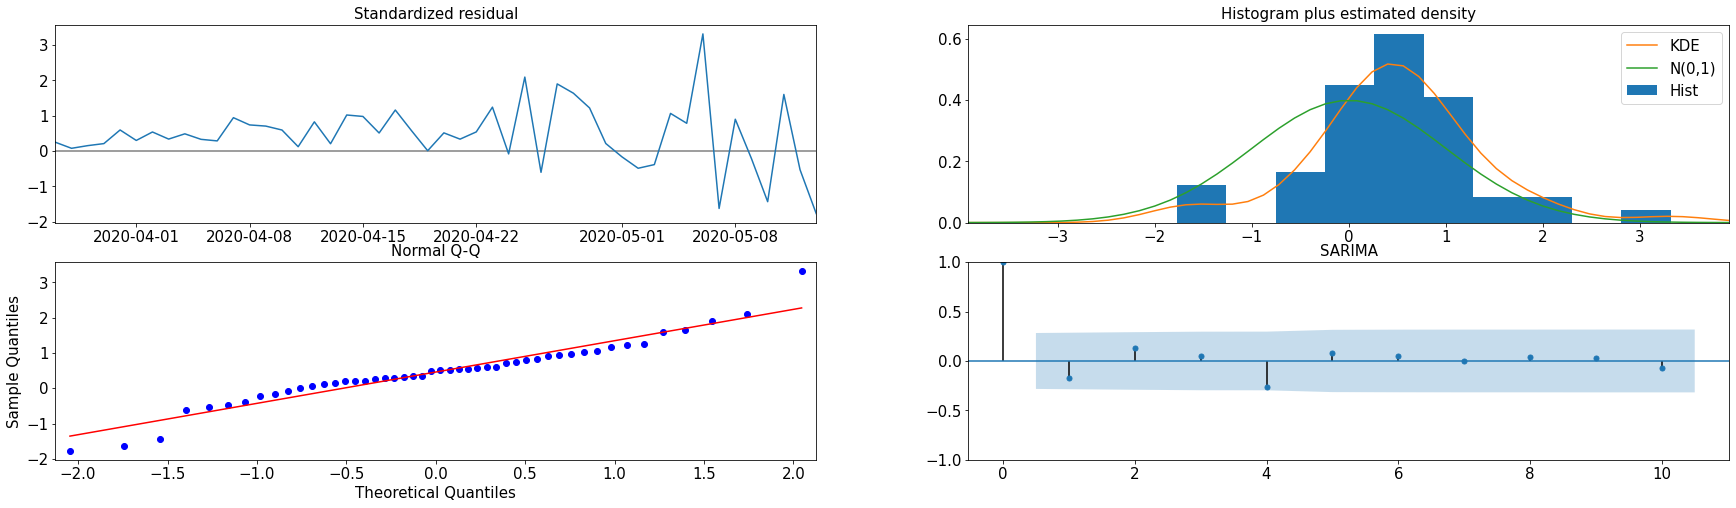

In [85]:
results.plot_diagnostics(figsize=(30, 8))
plt.title('SARIMA')
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png', dpi=150)

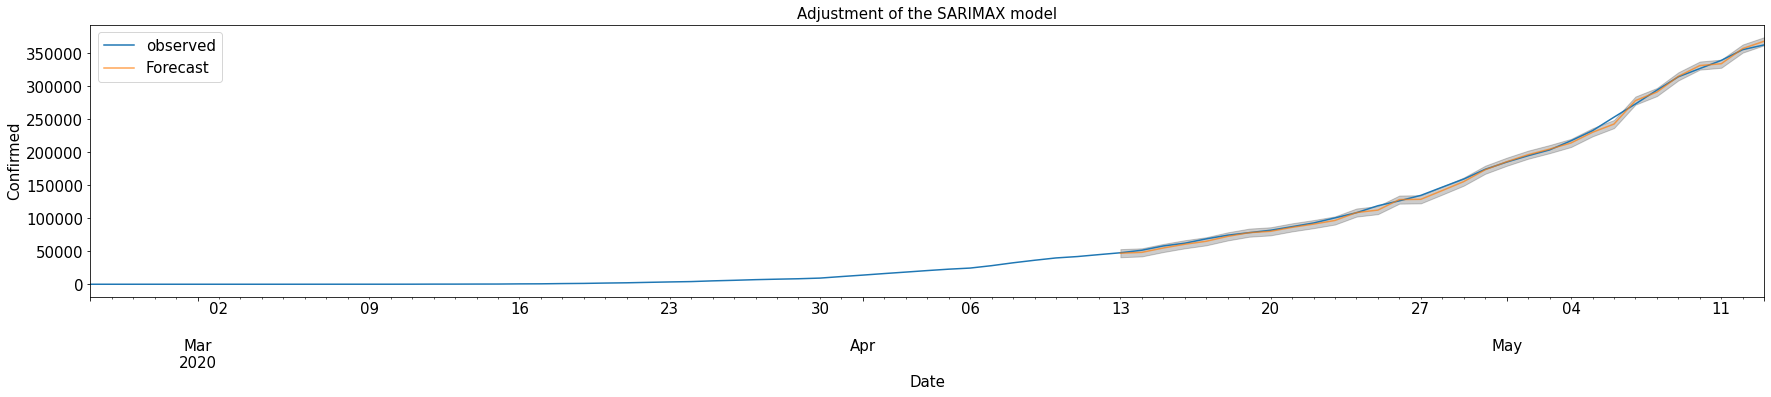

In [86]:
pred = results.get_prediction(start=pd.to_datetime(first), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=figsize)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel(campo)
plt.legend()
plt.title('Adjustment of the SARIMAX model')
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png', dpi=150)

In [87]:
y_forecasted = pred.predicted_mean
y_truth = y[first:]
mse = ((y_forecasted - y_truth) ** 2).mean()
print(f'The Mean Squared Error is {round(mse, 2)}')
print(f'The Root Mean Squared Error is {round(np.sqrt(mse), 2)}')

The Mean Squared Error is 13880638.06
The Root Mean Squared Error is 3725.67


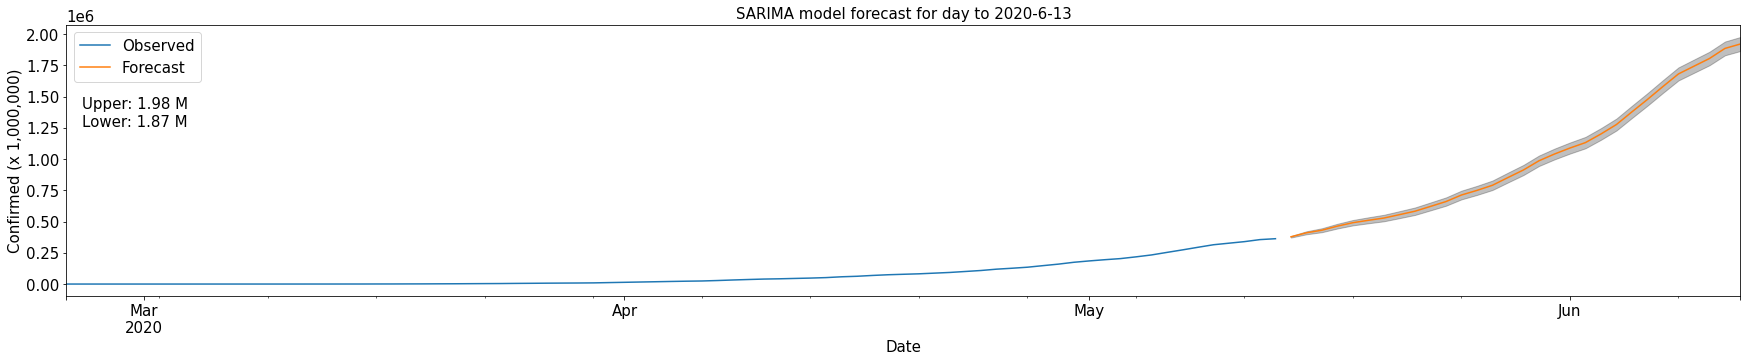

In [106]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Observed', figsize=figsize)
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel(campo + ' (x 1,000,000)')
upper = round(pred_uc.conf_int()['upper Confirmed'].tail(1).values[0], 2)
lower = round(pred_uc.conf_int()['lower Confirmed'].tail(1).values[0], 2)
plt.text(x='2020-02-26', y=lower-600000, s=
    'Upper: ' + str(round(upper/1000000, 2)) + ' M\n'+
    'Lower: ' + str(round(lower/1000000, 2)) + ' M'
)
plt.legend()
plt.title('SARIMA model forecast for day to ' + last)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png', dpi=150)

In [96]:
pred_ci

,lower Confirmed,upper Confirmed
2020-05-14,3.719014e+05,3.842350e+05
2020-05-15,3.981444e+05,4.222674e+05
2020-05-16,4.149589e+05,4.467664e+05
2020-05-17,4.445571e+05,4.825244e+05
2020-05-18,4.694438e+05,5.127025e+05
2020-05-19,4.862429e+05,5.342128e+05
2020-05-20,5.021729e+05,5.544310e+05
2020-05-21,5.271294e+05,5.833496e+05
2020-05-22,5.528115e+05,6.127324e+05
2020-05-23,5.894726e+05,6.528785e+05
